In [1]:
import ptracer as pt
import numpy as np
from importlib import reload
from forces import ray_tracer as rtf
from tqdm.notebook import tqdm
from random import random

%matplotlib notebook
import matplotlib.pyplot as plt

In [58]:
reload(pt)
reload(pt.jm)

<module 'jit_methods' from '/home/jdranczewski/Documents/Imperial/UROP20/optical-levitation-raytracing-experiments/jit_methods.py'>

In [59]:
pos = np.array([0, 0, 100e-6])
m = pt.MeshTO(pos, "symmetric_rotated.obj", 5e-6, n_in=1.52)
m2 = pt.Sphere(pos, 5e-6, n_in=1.52)
rf = pt.HexagonalGaussianRF([0,0,0], [0,0,1], 3.39728e-6, 300e-3, 100, 532, pos+[0,0,-5.1e-6], 5e-6)
s = pt.Scene(rf, [m])
s.run(limit=100)
s.propagate(1e-6)
print(s.momentum)

/home/jdranczewski/Documents/Imperial/UROP20/venv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/jdranczewski/Documents/Imperial/UROP20/venv/lib/python3.7/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/jdranczewski/Documents/Imperial/UROP20/venv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/jdranczewski/Documents/Imperial/UROP20/venv/lib/python3.7/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


[-3.49154497e+11 -2.01626285e+11  3.17674804e+14]


In [60]:
np.sum(s.r_dirs, axis=0)

array([1.69183647e-02, 9.85011705e-03, 1.02538297e+01])

<IPython.core.display.Javascript object>


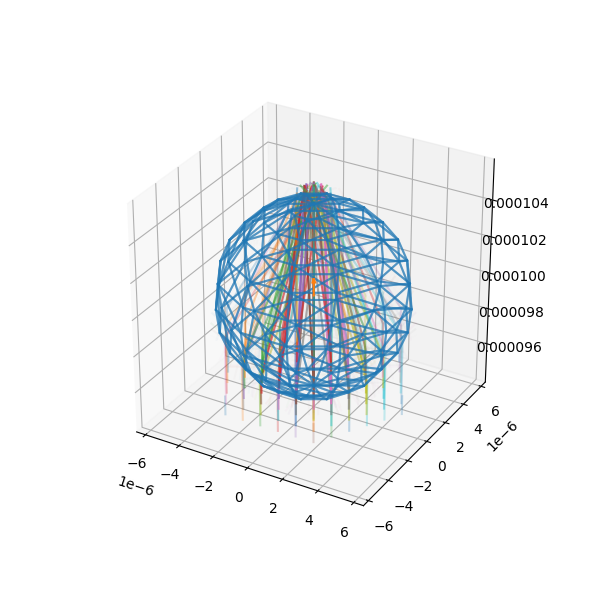

In [61]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
s.plot(ax, m_quiver=True, m_quiver_kwargs={"zorder":10, "color": "tab:orange"})

In [79]:
def rangle():
    return 2*np.pi*random()

In [62]:
moms = []
poss = []
intensity = []
xs = np.linspace(-2e-6, 2e-6, 11)
ys = np.linspace(-2e-6, 2e-6, 11)
for x in tqdm(xs):
    intensity.append([])
    for y in ys:
        pos = np.array([x, y, 200e-6])
        poss.append(pos)
        m = pt.MeshTO(pos, "six.obj", 5e-6, n_in=1.52)
        m2 = pt.Sphere(pos, 5e-6, n_in=1.52)
        rf = pt.HexagonalGaussianRF([0,0,0], [0,0,1], 3.39728e-6, 300e-3, 301, 532, pos+[0,0,-5.1e-6], 5e-6)
        intensity[-1].append(np.sum(rf.weights) * 6.62607004e-25 * 299792458 / 532)
        s = pt.Scene(rf, [m])
        s.run(limit=5)
        moms.append(s.momentum)
#         print(np.sum(s.r_dirs, axis=0))
#         print(s.momentum)
#         print(moms)
#         print("-"*15)
moms = np.array(moms)
poss = np.array(poss)

/home/jdranczewski/Documents/Imperial/UROP20/venv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/jdranczewski/Documents/Imperial/UROP20/venv/lib/python3.7/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


<IPython.core.display.Javascript object>


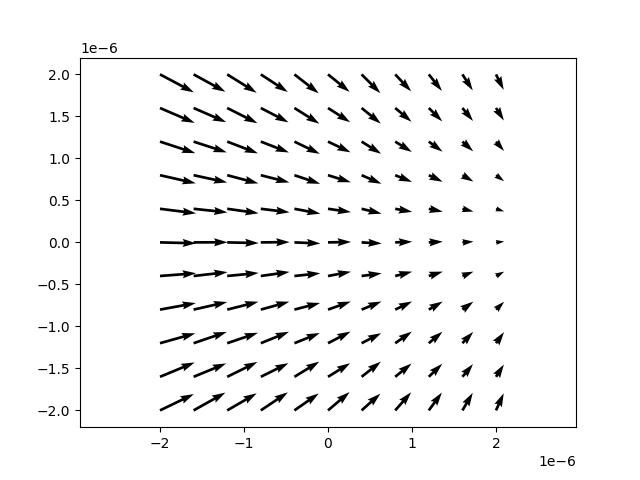

(-2.2e-06, 2.2e-06, -2.2e-06, 2.2e-06)

In [57]:
fig, ax = plt.subplots()
xx, yy = np.meshgrid(xs, ys)
ax.quiver(poss[:,0], poss[:,1], moms[:,0], moms[:,1])
ax.axis("equal")

<IPython.core.display.Javascript object>


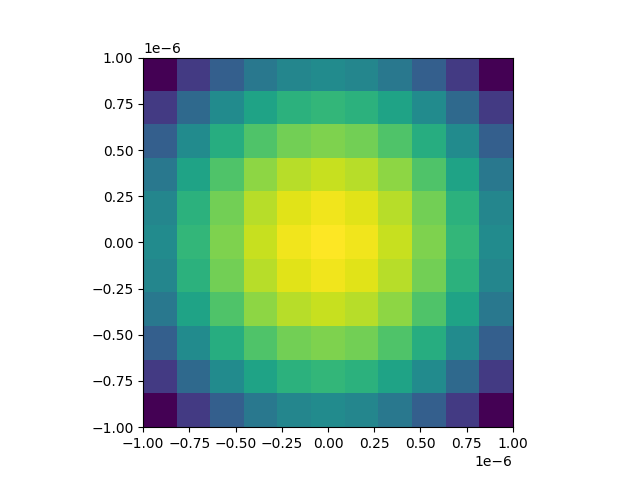

In [135]:
fig, ax = plt.subplots()
ax.imshow(intensity, extent=(-1e-6, 1e-6, -1e-6, 1e-6))